In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/H2GTRM.TTF'  # 폰트 파일 경로
fontprop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family=fontprop.get_name())

In [6]:
df = pd.read_csv('D:/김동영/11_Github/mygit/LGaimers 6기/Data/train.csv')
test_df = pd.read_csv('D:/김동영/11_Github/mygit/LGaimers 6기/Data/test.csv')

변수 간 관계 분석 함수    

In [7]:
def value_counts_ratio(df, col_name, target_name='임신 성공 여부'):
    """
    주어진 데이터프레임의 특정 열에 대해 각 값마다 타겟 변수의 비율과 갯수, 총 갯수를 출력하는 함수.

    Parameters:
    df (pd.DataFrame): 데이터프레임
    col_name (str): 열 이름
    target_name (str): 타겟 변수 이름
    """
    # 각 값마다 타겟 변수의 비율 계산
    value_counts = df.groupby(col_name)[target_name].value_counts(normalize=True).unstack().fillna(0)
    
    # 각 값마다 타겟 변수의 갯수 계산
    counts = df.groupby(col_name)[target_name].value_counts().unstack().fillna(0)
    
    # 각 값마다 총 갯수 계산
    total_counts = df[col_name].value_counts().rename('Total_Count')
    
    # 비율과 갯수를 합침
    result = value_counts.join(counts, lsuffix='_ratio', rsuffix='_count')
    
    # 총 갯수를 합침
    result = result.join(total_counts, on=col_name)
    
    # 출력 형식 조정
    result.index.name = 'variable'
    print(f"\n{col_name}별 {target_name} 비율 및 갯수\n")
    print(result.rename(columns=lambda x: x.split('_')[0]))
    
    
def summarize_grouped_data(df, group_by_columns):
    # 데이터프레임을 그룹화
    grouped_df = df.groupby(group_by_columns)
    
    # 결과를 저장할 리스트 초기화
    results = []
    
    # 그룹화된 데이터프레임의 내용을 확인하는 코드
    for name, group in grouped_df:
        # 그룹의 갯수 계산
        group_count = group.shape[0]
        
        # '임신 성공 여부' 변수의 '임신 실패' 비율과 갯수 계산
        adnormal_count = group['임신 성공 여부'].value_counts().get(0, 0)
        adnormal_ratio = adnormal_count / group_count
        
        # 결과 리스트에 추가
        results.append([name, adnormal_count, adnormal_ratio, group_count])
    
    # 결과 리스트를 데이터프레임으로 변환
    results_df = pd.DataFrame(results, columns=['group', "'임신 실패' count", 'ratio', 'Total'])
    
    # 그룹화된 변수들의 이름을 제목행으로 출력
    print(f"Grouped by: {', '.join(group_by_columns)}")
    print()
    # 데이터프레임 출력
    print(results_df)
    
    return results_df

훈련, 평가 데이터 결측치를 확인해본 결과 아래 변수들에서 동일한 수의 결측치가 동일하게 존재했다.   

단일 배아 이식 여부, 착상 전 유전 진단 사용 여부, 배아 생성 주요 이유, 총 생성 배아 수, 미세주입된 난자 수, 미세주입에서 생성된 배아 수   
이식된 배아 수, 미세주입 배아 이식 수, 저장된 배아 수, 미세주입 후 저장된 배아 수, 해동된 배아 수, 해동 난자 수, 수집된 신선 난자 수, 저장된 신선 난자 수   
파트너 정자와 혼합된 난자 수, 기증자 정자와 혼합된 난자 수, 동결 배아 사용 여부, 신선 배아 사용 여부, 기증 배아 사용 여부, 대리모 여부    


위의 변수들은 시술 유형이 DI인 경우에 전부 결측치였다.    
DI 시술을 사용할 경우 임신 실패 확률은 약 87%정도이다.    
반면 난자 출처가 본인 제공 혹은 기증 제공일 경우 임신 실패 확률이 약 73%였다.   

In [8]:
pd.set_option('display.max_rows', None)

# 결측치 개수 확인
missing_values = df.isnull().sum()
print(missing_values)

test_missing_values = test_df.isnull().sum() 
print(test_missing_values)

# # 결측치는 전부 -1로 대체
# df.fillna(-1, inplace=True)
# test_df.fillna(-1, inplace=True)

ID                            0
시술 시기 코드                      0
시술 당시 나이                      0
임신 시도 또는 마지막 임신 경과 연수    246981
시술 유형                         0
특정 시술 유형                      2
배란 자극 여부                      0
배란 유도 유형                      0
단일 배아 이식 여부                6291
착상 전 유전 검사 사용 여부         253633
착상 전 유전 진단 사용 여부           6291
남성 주 불임 원인                    0
남성 부 불임 원인                    0
여성 주 불임 원인                    0
여성 부 불임 원인                    0
부부 주 불임 원인                    0
부부 부 불임 원인                    0
불명확 불임 원인                     0
불임 원인 - 난관 질환                 0
불임 원인 - 남성 요인                 0
불임 원인 - 배란 장애                 0
불임 원인 - 여성 요인                 0
불임 원인 - 자궁경부 문제               0
불임 원인 - 자궁내막증                 0
불임 원인 - 정자 농도                 0
불임 원인 - 정자 면역학적 요인            0
불임 원인 - 정자 운동성                0
불임 원인 - 정자 형태                 0
배아 생성 주요 이유                6291
총 시술 횟수                       0
클리닉 내 총 시술 횟수                 0
IVF 시술 횟

In [95]:
# 기본 통계량 확인
df.describe()

# # 결측치 확인
# print(df.isnull().sum())

print(df.columns)

Index(['ID', '시술 시기 코드', '시술 당시 나이', '임신 시도 또는 마지막 임신 경과 연수', '시술 유형',
       '특정 시술 유형', '배란 자극 여부', '배란 유도 유형', '단일 배아 이식 여부', '착상 전 유전 검사 사용 여부',
       '착상 전 유전 진단 사용 여부', '남성 주 불임 원인', '남성 부 불임 원인', '여성 주 불임 원인',
       '여성 부 불임 원인', '부부 주 불임 원인', '부부 부 불임 원인', '불명확 불임 원인', '불임 원인 - 난관 질환',
       '불임 원인 - 남성 요인', '불임 원인 - 배란 장애', '불임 원인 - 여성 요인', '불임 원인 - 자궁경부 문제',
       '불임 원인 - 자궁내막증', '불임 원인 - 정자 농도', '불임 원인 - 정자 면역학적 요인',
       '불임 원인 - 정자 운동성', '불임 원인 - 정자 형태', '배아 생성 주요 이유', '총 시술 횟수',
       '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수', 'IVF 임신 횟수',
       'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '총 생성 배아 수',
       '미세주입된 난자 수', '미세주입에서 생성된 배아 수', '이식된 배아 수', '미세주입 배아 이식 수', '저장된 배아 수',
       '미세주입 후 저장된 배아 수', '해동된 배아 수', '해동 난자 수', '수집된 신선 난자 수', '저장된 신선 난자 수',
       '혼합된 난자 수', '파트너 정자와 혼합된 난자 수', '기증자 정자와 혼합된 난자 수', '난자 출처', '정자 출처',
       '난자 기증자 나이', '정자 기증자 나이', '동결 배아 사용 여부', '신선 배아 사용 여부', '기증 배아 사용 여부',
       '대리모 여부', 'PGD 시술 여부', 'PGS 시술 여부

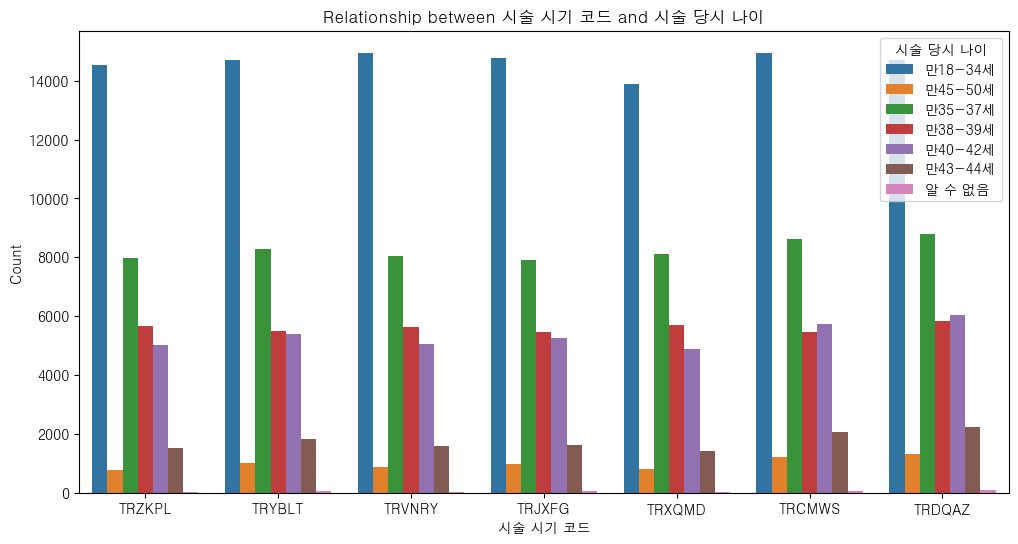

In [96]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='시술 시기 코드', hue='시술 당시 나이')
plt.title('Relationship between 시술 시기 코드 and 시술 당시 나이')
plt.xlabel('시술 시기 코드')
plt.ylabel('Count')
plt.legend(title='시술 당시 나이')
plt.show()

시술 당시 나이와 임신 성공 여부 간의 관계를 그래프로 확인해본 결과 나이가 많을수록 불임될 확률이 더 높았다. 그리고 시술 당시 나이를 확인할 수 없는 경우 전부 불임되었다. 

<Axes: xlabel='시술 당시 나이', ylabel='count'>

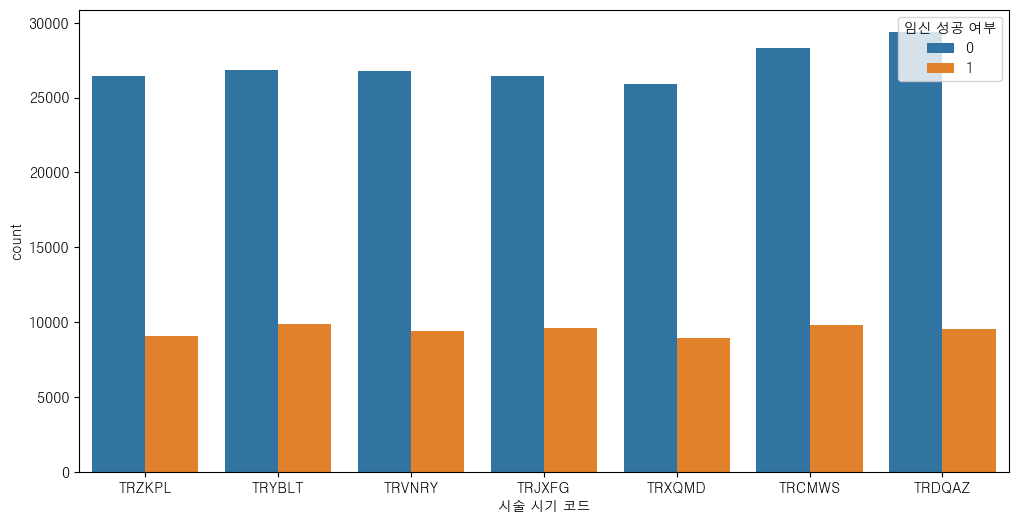

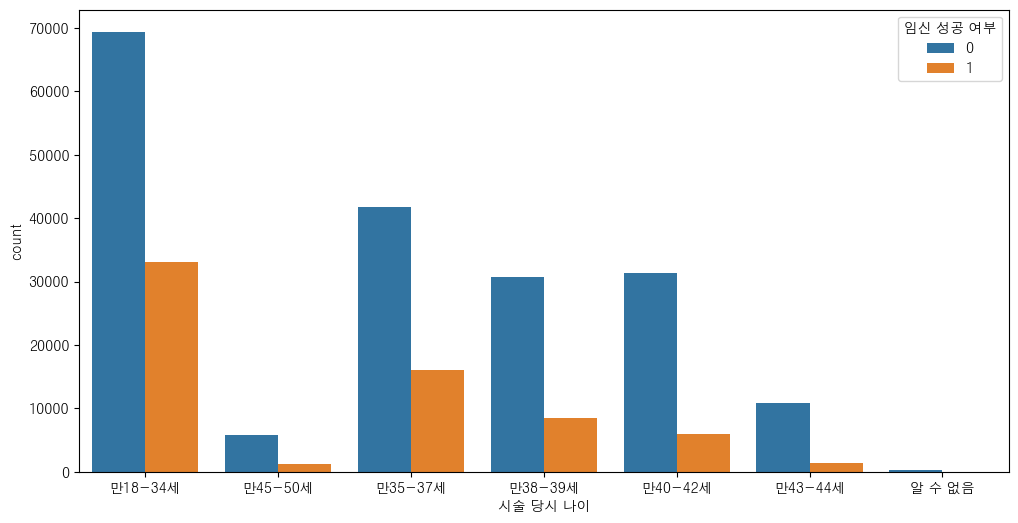

In [97]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='시술 시기 코드', hue='임신 성공 여부')

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='시술 당시 나이', hue='임신 성공 여부')

In [99]:
value_counts_ratio(df, '시술 시기 코드')
value_counts_ratio(df, '시술 당시 나이')


시술 시기 코드별 임신 성공 여부 비율 및 갯수

                 0         1      0     1  Total
variable                                        
TRCMWS    0.742583  0.257417  28285  9805  38090
TRDQAZ    0.754574  0.245426  29405  9564  38969
TRJXFG    0.733729  0.266271  26437  9594  36031
TRVNRY    0.740221  0.259779  26776  9397  36173
TRXQMD    0.743878  0.256122  25910  8921  34831
TRYBLT    0.730913  0.269087  26834  9879  36713
TRZKPL    0.744880  0.255120  26476  9068  35544

시술 당시 나이별 임신 성공 여부 비율 및 갯수

                 0         1        0        1   Total
variable                                              
만18-34세   0.677378  0.322622  69415.0  33061.0  102476
만35-37세   0.721599  0.278401  41694.0  16086.0   57780
만38-39세   0.782862  0.217138  30725.0   8522.0   39247
만40-42세   0.840607  0.159393  31395.0   5953.0   37348
만43-44세   0.881988  0.118012  10807.0   1446.0   12253
만45-50세   0.832321  0.167679   5758.0   1160.0    6918
알 수 없음    1.000000  0.000000    329.0      0.0     329


In [62]:
summarize_grouped_data(df, ['시술 당시 나이'])

Grouped by: 시술 당시 나이

        group  '임신 실패' count     ratio   Total
0  (만18-34세,)          69415  0.677378  102476
1  (만35-37세,)          41694  0.721599   57780
2  (만38-39세,)          30725  0.782862   39247
3  (만40-42세,)          31395  0.840607   37348
4  (만43-44세,)          10807  0.881988   12253
5  (만45-50세,)           5758  0.832321    6918
6   (알 수 없음,)            329  1.000000     329


,group,'임신 실패' count,ratio,Total
0,"(만18-34세,)",69415,0.677378,102476
1,"(만35-37세,)",41694,0.721599,57780
2,"(만38-39세,)",30725,0.782862,39247
3,"(만40-42세,)",31395,0.840607,37348
4,"(만43-44세,)",10807,0.881988,12253
5,"(만45-50세,)",5758,0.832321,6918
6,"(알 수 없음,)",329,1.000000,329


임신 시도 또는 마지막 임신 경과 연수 변수와 타겟 변수간의 관계를 확인해본 결과 임신 시도 또는 마지막ㄱ 임신 경과 연수가 높아지자 임신 성공확률은 낮아지고 임신 실패 확률이 높아졌다.  
-->  횟수 크기에 따른 구간을 정해서 변수 범주화를 시도해봐도 좋을 것 같다.    

In [100]:
value_counts_ratio(df, '임신 시도 또는 마지막 임신 경과 연수')


임신 시도 또는 마지막 임신 경과 연수별 임신 성공 여부 비율 및 갯수

                 0         1       0      1   Total
variable                                           
-1.0      0.740073  0.259927  182784  64197  246981
 0.0      0.666667  0.333333       8      4      12
 1.0      0.666667  0.333333       4      2       6
 2.0      0.809524  0.190476      17      4      21
 3.0      0.752809  0.247191      67     22      89
 4.0      0.757377  0.242623     231     74     305
 5.0      0.754335  0.245665     522    170     692
 6.0      0.750757  0.249243     744    247     991
 7.0      0.764415  0.235585     928    286    1214
 8.0      0.784864  0.215136     923    253    1176
 9.0      0.795699  0.204301     814    209    1023
 10.0     0.778247  0.221753     737    210     947
 11.0     0.810271  0.189729     568    133     701
 12.0     0.780392  0.219608     398    112     510
 13.0     0.837838  0.162162     403     78     481
 14.0     0.776435  0.223565     257     74     331
 15.0     0.791339  0.

In [102]:
summarize_grouped_data(df, ['시술 당시 나이', '임신 시도 또는 마지막 임신 경과 연수'])

Grouped by: 시술 당시 나이, 임신 시도 또는 마지막 임신 경과 연수

               group  '임신 실패' count     ratio   Total
0    (만18-34세, -1.0)          67692  0.676278  100095
1     (만18-34세, 0.0)              1  0.333333       3
2     (만18-34세, 1.0)              0  0.000000       1
3     (만18-34세, 2.0)              2  0.400000       5
4     (만18-34세, 3.0)             15  0.555556      27
5     (만18-34세, 4.0)             58  0.630435      92
6     (만18-34세, 5.0)            154  0.719626     214
7     (만18-34세, 6.0)            214  0.727891     294
8     (만18-34세, 7.0)            257  0.715877     359
9     (만18-34세, 8.0)            220  0.738255     298
10    (만18-34세, 9.0)            207  0.726316     285
11   (만18-34세, 10.0)            192  0.750000     256
12   (만18-34세, 11.0)            133  0.760000     175
13   (만18-34세, 12.0)             81  0.704348     115
14   (만18-34세, 13.0)             81  0.764151     106
15   (만18-34세, 14.0)             38  0.678571      56
16   (만18-34세, 15.0)             35  

,group,'임신 실패' count,ratio,Total
0,"(만18-34세, -1.0)",67692,0.676278,100095
1,"(만18-34세, 0.0)",1,0.333333,3
2,"(만18-34세, 1.0)",0,0.000000,1
3,"(만18-34세, 2.0)",2,0.400000,5
4,"(만18-34세, 3.0)",15,0.555556,27
5,"(만18-34세, 4.0)",58,0.630435,92
6,"(만18-34세, 5.0)",154,0.719626,214
7,"(만18-34세, 6.0)",214,0.727891,294
8,"(만18-34세, 7.0)",257,0.715877,359
9,"(만18-34세, 8.0)",220,0.738255,298


시술 유형에 따른 임신 성공 여부 비교    

DI, IVF가 있으며 IVF 시술이 DI보다 더 많다. DI: 6291, IVF: 250060   
DI 시술의 임신 실패 확률은 0.87로 IVF보다 더 높다. IVF는 임신 실패 확률이 0.74이다     

In [103]:
summarize_grouped_data(df, ['시술 유형'])

Grouped by: 시술 유형

    group  '임신 실패' count     ratio   Total
0   (DI,)           5480  0.871086    6291
1  (IVF,)         184643  0.738395  250060


,group,'임신 실패' count,ratio,Total
0,"(DI,)",5480,0.871086,6291
1,"(IVF,)",184643,0.738395,250060


특정 시술 유형은 시술 유형 IVF, DI에 따라 명확히 나뉜다.    
시술 유형 - 특정 시술 유형    
DI -  GENERIC DI, GIFT, ICI, IUI, IVI   
IVF - GIFT, FER, ICSI, IVF~, UNKNOWN, 결측치(-1)    

DI 시술 경우 특정 시술이 IUI, IVI일 때 임신 실패 확률이 올라갔다.   
IVF 시술 경우 ICSI:ICSI, ICSI:Unknown, IVF / AH, IVF:IVF일 때 임신 실패 확률이 0.8이상 기록했다.    

DI, IVF 각 시술 내에서도 특정 시술에 따라 임신 실패 확률이 상이했다. --> 시술 유형 변수는 제거하고 특정 시술 유형 변수만 사용해도 좋을 것 같다.   


In [105]:
value_counts_ratio(df, '특정 시술 유형')
summarize_grouped_data(df, ['시술 유형', '특정 시술 유형'])


특정 시술 유형별 임신 성공 여부 비율 및 갯수

                                            0         1        0        1  \
variable                                                                    
-1                                   1.000000  0.000000      2.0      0.0   
FER                                  0.666667  0.333333      2.0      1.0   
GIFT                                 1.000000  0.000000      2.0      0.0   
Generic DI                           0.830986  0.169014     59.0     12.0   
ICI                                  0.864583  0.135417     83.0     13.0   
ICSI                                 0.727175  0.272825  88983.0  33385.0   
ICSI / AH                            0.782835  0.217165    602.0    167.0   
ICSI / AH:Unknown                    0.500000  0.500000      1.0      1.0   
ICSI / BLASTOCYST                    0.643257  0.356743   1035.0    574.0   
ICSI / BLASTOCYST :ICSI              0.000000  1.000000      0.0      1.0   
ICSI / BLASTOCYST :IVF / BLASTOCYST  0.750000  

,group,'임신 실패' count,ratio,Total
0,"(DI, GIFT)",1,1.000000,1
1,"(DI, Generic DI)",59,0.830986,71
2,"(DI, ICI)",83,0.864583,96
3,"(DI, IUI)",5316,0.871475,6100
4,"(DI, IVI)",21,0.913043,23
5,"(IVF, -1)",2,1.000000,2
6,"(IVF, FER)",2,0.666667,3
7,"(IVF, GIFT)",1,1.000000,1
8,"(IVF, ICSI)",88983,0.727175,122368
9,"(IVF, ICSI / AH)",602,0.782835,769


In [106]:
# 범주형 변수

# 결측치 -1로 처리
df['착상 전 유전 검사 사용 여부'].fillna(-1, inplace=True)

one_hot_vector_list = ['배란 자극 여부', '단일 배아 이식 여부', '착상 전 유전 검사 사용 여부',
      '착상 전 유전 진단 사용 여부', '남성 주 불임 원인', '남성 부 불임 원인', '여성 주 불임 원인',
       '여성 부 불임 원인', '부부 주 불임 원인', '부부 부 불임 원인', '불명확 불임 원인', '불임 원인 - 난관 질환',
       '불임 원인 - 남성 요인', '불임 원인 - 배란 장애', '불임 원인 - 여성 요인', '불임 원인 - 자궁경부 문제',
       '불임 원인 - 자궁내막증', '불임 원인 - 정자 농도', '불임 원인 - 정자 면역학적 요인',
       '불임 원인 - 정자 운동성', '불임 원인 - 정자 형태', '동결 배아 사용 여부', '신선 배아 사용 여부', '기증 배아 사용 여부',
       '대리모 여부', 'PGD 시술 여부', 'PGS 시술 여부']

categorical_features = ['배란 유도 유형', '배아 생성 주요 이유', '총 시술 횟수',
       '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수', 'IVF 임신 횟수',
       'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '난자 출처', '정자 출처',
       '난자 기증자 나이', '정자 기증자 나이']

C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_14704\1013204109.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['착상 전 유전 검사 사용 여부'].fillna(-1, inplace=True)


In [107]:
for col in one_hot_vector_list:
  value_counts_ratio(df, col)



배란 자극 여부별 임신 성공 여부 비율 및 갯수

                 0         1       0      1   Total
variable                                           
0         0.768348  0.231652   45049  13582   58631
1         0.733735  0.266265  145074  52646  197720

단일 배아 이식 여부별 임신 성공 여부 비율 및 갯수

                 0         1       0      1   Total
variable                                           
-1.0      0.871086  0.128914    5480    811    6291
 0.0      0.770567  0.229433  147700  43977  191677
 1.0      0.632770  0.367230   36943  21440   58383

착상 전 유전 검사 사용 여부별 임신 성공 여부 비율 및 갯수

                 0         1       0      1   Total
variable                                           
-1.0      0.740471  0.259529  187808  65825  253633
 1.0      0.851729  0.148271    2315    403    2718

착상 전 유전 진단 사용 여부별 임신 성공 여부 비율 및 갯수

                 0         1       0      1   Total
variable                                           
-1.0      0.871086  0.128914    5480    811    6291
 0.0      0.737495  0.262505  182

동결 배아 사용 여부, 신선 배아 사용 여부, 기증 배아 사용 여부 변수는 하나의 변수로 합쳐서 변수 개수를 줄여준다.   

In [111]:
summarize_grouped_data(df, ['동결 배아 사용 여부', '신선 배아 사용 여부',  '기증 배아 사용 여부'])

Grouped by: 동결 배아 사용 여부, 신선 배아 사용 여부, 기증 배아 사용 여부

                group  '임신 실패' count     ratio   Total
0  (-1.0, -1.0, -1.0)           5480  0.871086    6291
1     (0.0, 0.0, 0.0)              2  0.666667       3
2     (0.0, 1.0, 0.0)         152806  0.733023  208460
3     (0.0, 1.0, 1.0)            914  0.621346    1471
4     (1.0, 0.0, 0.0)          30017  0.770971   38934
5     (1.0, 0.0, 1.0)            739  0.748734     987
6     (1.0, 1.0, 0.0)            165  0.804878     205


,group,'임신 실패' count,ratio,Total
0,"(-1.0, -1.0, -1.0)",5480,0.871086,6291
1,"(0.0, 0.0, 0.0)",2,0.666667,3
2,"(0.0, 1.0, 0.0)",152806,0.733023,208460
3,"(0.0, 1.0, 1.0)",914,0.621346,1471
4,"(1.0, 0.0, 0.0)",30017,0.770971,38934
5,"(1.0, 0.0, 1.0)",739,0.748734,987
6,"(1.0, 1.0, 0.0)",165,0.804878,205


PGD 시술과 PGS 시술을 동시에 한 경우는 없었다. 따라서 이 두 변수를 하나의 변수로 합쳐주어도 좋을 거 같다.   
예) PGD 시술 - 0, PGS 시술 - 1, 결측치 - -1   

In [109]:
summarize_grouped_data(df, ['PGD 시술 여부', 'PGS 시술 여부'])

Grouped by: PGD 시술 여부, PGS 시술 여부

          group  '임신 실패' count     ratio   Total
0  (-1.0, -1.0)         187022  0.741436  252243
1   (-1.0, 1.0)           1531  0.793675    1929
2   (1.0, -1.0)           1570  0.720514    2179


,group,'임신 실패' count,ratio,Total
0,"(-1.0, -1.0)",187022,0.741436,252243
1,"(-1.0, 1.0)",1531,0.793675,1929
2,"(1.0, -1.0)",1570,0.720514,2179


배란 유도 유형: 대부분 기록되지 않은 시행, 알 수 없음 --> 대부분 차지   '중요도 낮은 변수'    
배아 생성 주요 이유: '기증용', '기증용, 난자 저장용', '기증용, 배아 저장용', '난자 저장용', '배아 저장용' --> 임신 실패 확률이 100%에 육박한다.  '중요도 높은 변수'        


In [112]:
for col in categorical_features:
  value_counts_ratio(df, col)


배란 유도 유형별 임신 성공 여부 비율 및 갯수

                     0         1         0        1   Total
variable                                                   
기록되지 않은 시행    0.731593  0.268407  142245.0  52187.0  194432
생식선 자극 호르몬    0.000000  1.000000       0.0      1.0       1
세트로타이드 (억제제)  1.000000  0.000000       1.0      0.0       1
알 수 없음        0.773245  0.226755   47877.0  14040.0   61917

배아 생성 주요 이유별 임신 성공 여부 비율 및 갯수

                            0         1         0        1   Total
variable                                                          
-1                   0.871086  0.128914    5480.0    811.0    6291
기증용                  1.000000  0.000000    1108.0      0.0    1108
기증용, 난자 저장용          1.000000  0.000000      44.0      0.0      44
기증용, 배아 저장용          1.000000  0.000000     125.0      0.0     125
기증용, 배아 저장용, 현재 시술용  0.650000  0.350000      13.0      7.0      20
기증용, 현재 시술용          0.620243  0.379757    2347.0   1437.0    3784
난자 저장용               1.000000  0.000000    

난자 기증자 나이별, 정자 기증자 나이별    

In [116]:
summarize_grouped_data(df, ['난자 기증자 나이'])

Grouped by: 난자 기증자 나이

        group  '임신 실패' count     ratio   Total
0  (만20세 이하,)            217  0.738095     294
1  (만21-25세,)           1564  0.670094    2334
2  (만26-30세,)           3243  0.651728    4976
3  (만31-35세,)           4423  0.694785    6366
4   (알 수 없음,)         180676  0.745421  242381


,group,'임신 실패' count,ratio,Total
0,"(만20세 이하,)",217,0.738095,294
1,"(만21-25세,)",1564,0.670094,2334
2,"(만26-30세,)",3243,0.651728,4976
3,"(만31-35세,)",4423,0.694785,6366
4,"(알 수 없음,)",180676,0.745421,242381


불임 원인 변수    

남성, 여성, 부부 에서 불임 원인이 있을 경우 임신 실패 확률이 없는 경우보다 더 높다    

여성 불임 원인: 난관 질환, 배란 장애, 자궁경부 문제, 자궁내막증   
남성 불임 원인: 정자 농도, 정자 면역학적 요인, 정자 운동성, 정자 형태   

불명확한 원인인 경우에는 0, 1 차이 없다. --> 중요하지 않은 변수   

남성 주, 여성 주, 부부 주 불임 원인 변수를 하나로 합치는 것을 고려해볼 수 있다. 예) 불임 원인이 없는 경우 - 0, 불임 원인이 하나로 있는 경우 - 1    
남성 부, 여성 부, 부부 부 불임 원인 변수를 하나로 합치는 것을 고려해볼 수 있다. 예) 불임 원인이 없는 경우 - 0, 불임 원인이 하나로 있는 경우 - 1      

In [142]:
reason=['남성 주 불임 원인', '남성 부 불임 원인', '여성 주 불임 원인',
 '여성 부 불임 원인', '부부 주 불임 원인', '부부 부 불임 원인', '불명확 불임 원인', '불임 원인 - 난관 질환',
 '불임 원인 - 남성 요인', '불임 원인 - 배란 장애', '불임 원인 - 여성 요인', '불임 원인 - 자궁경부 문제',
 '불임 원인 - 자궁내막증', '불임 원인 - 정자 농도', '불임 원인 - 정자 면역학적 요인',
 '불임 원인 - 정자 운동성', '불임 원인 - 정자 형태']

# 성별, 부부 불임 원인에 따른 임신 성공 여부
summarize_grouped_data(df, ['남성 주 불임 원인', '남성 부 불임 원인'])
summarize_grouped_data(df, ['여성 주 불임 원인', '여성 부 불임 원인'])
summarize_grouped_data(df, ['부부 주 불임 원인', '부부 부 불임 원인'])
summarize_grouped_data(df, ['여성 주 불임 원인', '남성 주 불임 원인', '부부 주 불임 원인'])
summarize_grouped_data(df, ['여성 부 불임 원인', '남성 부 불임 원인', '부부 부 불임 원인'])


# summarize_grouped_data(df, ['불명확 불임 원인'])

# summarize_grouped_data(df, ['부부 주 불임 원인', '부부 부 불임 원인'])

# # 
# summarize_grouped_data(df, ['남성 주 불임 원인', '남성 부 불임 원인' , '불임 원인 - 남성 요인', '불임 원인 - 정자 농도', '불임 원인 - 정자 면역학적 요인',
#  '불임 원인 - 정자 운동성', '불임 원인 - 정자 형태'])

# summarize_grouped_data(df, ['여성 주 불임 원인', '여성 부 불임 원인' , '불임 원인 - 여성 요인', '불임 원인 - 난관 질환', '불임 원인 - 배란 장애', '불임 원인 - 자궁경부 문제',
#  '불임 원인 - 자궁내막증'])

summarize_grouped_data(df, ['불임 원인 - 정자 농도', '불임 원인 - 정자 면역학적 요인', '불임 원인 - 정자 운동성', '불임 원인 - 정자 형태'])

Grouped by: 남성 주 불임 원인, 남성 부 불임 원인

    group  '임신 실패' count     ratio   Total
0  (0, 0)         181726  0.739680  245682
1  (0, 1)           2695  0.802322    3359
2  (1, 0)           5699  0.779937    7307
3  (1, 1)              3  1.000000       3
Grouped by: 여성 주 불임 원인, 여성 부 불임 원인

    group  '임신 실패' count     ratio   Total
0  (0, 0)         181415  0.739579  245295
1  (0, 1)           2558  0.804403    3180
2  (1, 0)           6145  0.780912    7869
3  (1, 1)              5  0.714286       7
Grouped by: 부부 주 불임 원인, 부부 부 불임 원인

    group  '임신 실패' count     ratio   Total
0  (0, 0)         181692  0.739689  245633
1  (0, 1)           1821  0.812584    2241
2  (1, 0)           6604  0.779601    8471
3  (1, 1)              6  1.000000       6
Grouped by: 여성 주 불임 원인, 남성 주 불임 원인, 부부 주 불임 원인

       group  '임신 실패' count     ratio   Total
0  (0, 0, 0)         183048  0.740192  247298
1  (0, 0, 1)            215  0.746528     288
2  (0, 1, 0)             17  0.739130      23
3  (0, 1, 1)   

,group,'임신 실패' count,ratio,Total
0,"(0, 0, 0, 0)",189795,0.741616,255921
1,"(0, 0, 0, 1)",69,0.758242,91
2,"(0, 0, 1, 0)",35,0.833333,42
3,"(0, 0, 1, 1)",16,0.800000,20
4,"(0, 1, 0, 0)",1,1.000000,1
5,"(1, 0, 0, 0)",176,0.739496,238
6,"(1, 0, 0, 1)",2,0.666667,3
7,"(1, 0, 1, 0)",5,0.833333,6
8,"(1, 0, 1, 1)",24,0.827586,29


시술 유형과 불임 원인 간의 관계   

In [154]:
summarize_grouped_data(df, ['특정 시술 유형', '남성 주 불임 원인'])
summarize_grouped_data(df, ['특정 시술 유형', '여성 주 불임 원인'])

Grouped by: 특정 시술 유형, 남성 주 불임 원인

                                       group  '임신 실패' count     ratio   Total
0                                    (-1, 0)              2  1.000000       2
1                                   (FER, 0)              2  0.666667       3
2                                  (GIFT, 0)              2  1.000000       2
3                            (Generic DI, 0)             58  0.828571      70
4                            (Generic DI, 1)              1  1.000000       1
5                                   (ICI, 0)             79  0.877778      90
6                                   (ICI, 1)              4  0.666667       6
7                                  (ICSI, 0)          86747  0.726360  119427
8                                  (ICSI, 1)           2236  0.760286    2941
9                             (ICSI / AH, 0)            590  0.782493     754
10                            (ICSI / AH, 1)             12  0.800000      15
11                    (ICSI / 

,group,'임신 실패' count,ratio,Total
0,"(-1, 0)",2,1.000000,2
1,"(FER, 0)",2,0.666667,3
2,"(GIFT, 0)",2,1.000000,2
3,"(Generic DI, 0)",58,0.828571,70
4,"(Generic DI, 1)",1,1.000000,1
5,"(ICI, 0)",77,0.875000,88
6,"(ICI, 1)",6,0.750000,8
7,"(ICSI, 0)",86558,0.726261,119183
8,"(ICSI, 1)",2425,0.761381,3185
9,"(ICSI / AH, 0)",586,0.783422,748


총 시술 횟수 = IVF 시술 횟수 + DI 시술 횟수   
총 임신 횟수 = IVF 임신 횟수 + DI 임신 횟수   
총 출산 횟수 = IVF 출산 횟수 + DI 임신 횟수   

'총 시술 횟수', '총 임신 횟수', '총 출산 횟수' 이 변수들은 사용하지 않아도 될 것 같다    

In [121]:
summarize_grouped_data(df, ['총 시술 횟수', '총 임신 횟수'])

Grouped by: 총 시술 횟수, 총 임신 횟수

             group  '임신 실패' count     ratio  Total
0         (0회, 0회)          69199  0.709013  97599
1         (1회, 0회)          35011  0.758947  46131
2         (1회, 1회)           7606  0.711639  10688
3         (2회, 0회)          21318  0.770995  27650
4         (2회, 1회)           7725  0.720683  10719
5         (2회, 2회)            690  0.712074    969
6         (3회, 0회)          11872  0.780436  15212
7         (3회, 1회)           5929  0.738540   8028
8         (3회, 2회)            886  0.722675   1226
9         (3회, 3회)             46  0.707692     65
10        (4회, 0회)           6652  0.796265   8354
11        (4회, 1회)           4109  0.748179   5492
12        (4회, 2회)            843  0.716228   1177
13        (4회, 3회)             81  0.757009    107
14        (4회, 4회)              7  0.636364     11
15        (5회, 0회)           3662  0.799040   4583
16        (5회, 1회)           2690  0.772323   3483
17        (5회, 2회)            690  0.755750    913
1

,group,'임신 실패' count,ratio,Total
0,"(0회, 0회)",69199,0.709013,97599
1,"(1회, 0회)",35011,0.758947,46131
2,"(1회, 1회)",7606,0.711639,10688
3,"(2회, 0회)",21318,0.770995,27650
4,"(2회, 1회)",7725,0.720683,10719
5,"(2회, 2회)",690,0.712074,969
6,"(3회, 0회)",11872,0.780436,15212
7,"(3회, 1회)",5929,0.738540,8028
8,"(3회, 2회)",886,0.722675,1226
9,"(3회, 3회)",46,0.707692,65


In [117]:
summarize_grouped_data(df, ['총 임신 횟수', '총 출산 횟수'])

Grouped by: 총 임신 횟수, 총 출산 횟수

             group  '임신 실패' count     ratio   Total
0         (0회, 0회)         152538  0.742545  205426
1         (1회, 0회)           9200  0.752003   12234
2         (1회, 1회)          23106  0.731318   31595
3         (2회, 0회)            644  0.761229     846
4         (2회, 1회)           2541  0.741249    3428
5         (2회, 2회)           1450  0.735294    1972
6         (3회, 0회)             36  0.750000      48
7         (3회, 1회)            250  0.786164     318
8         (3회, 2회)            183  0.737903     248
9         (3회, 3회)             94  0.712121     132
10        (4회, 0회)              1  1.000000       1
11        (4회, 1회)             20  0.714286      28
12        (4회, 2회)             17  0.894737      19
13        (4회, 3회)             26  0.787879      33
14        (4회, 4회)              9  0.750000      12
15        (5회, 2회)              2  0.666667       3
16        (5회, 3회)              2  0.666667       3
17        (5회, 4회)              1 

,group,'임신 실패' count,ratio,Total
0,"(0회, 0회)",152538,0.742545,205426
1,"(1회, 0회)",9200,0.752003,12234
2,"(1회, 1회)",23106,0.731318,31595
3,"(2회, 0회)",644,0.761229,846
4,"(2회, 1회)",2541,0.741249,3428
5,"(2회, 2회)",1450,0.735294,1972
6,"(3회, 0회)",36,0.750000,48
7,"(3회, 1회)",250,0.786164,318
8,"(3회, 2회)",183,0.737903,248
9,"(3회, 3회)",94,0.712121,132


In [122]:
summarize_grouped_data(df, ['총 시술 횟수', '총 생성 배아 수'])

Grouped by: 총 시술 횟수, 총 생성 배아 수

             group  '임신 실패' count     ratio  Total
0       (0회, -1.0)            367  0.926768    396
1        (0회, 0.0)           4955  0.967962   5119
2        (0회, 1.0)           4761  0.887749   5363
3        (0회, 2.0)           5944  0.802918   7403
4        (0회, 3.0)           6527  0.739436   8827
5        (0회, 4.0)           6566  0.700747   9370
6        (0회, 5.0)           6287  0.678795   9262
7        (0회, 6.0)           5849  0.664131   8807
8        (0회, 7.0)           5104  0.650605   7845
9        (0회, 8.0)           4409  0.638338   6907
10       (0회, 9.0)           3718  0.637736   5830
11      (0회, 10.0)           3027  0.632338   4787
12      (0회, 11.0)           2443  0.627537   3893
13      (0회, 12.0)           2061  0.646487   3188
14      (0회, 13.0)           1518  0.630923   2406
15      (0회, 14.0)           1281  0.647297   1979
16      (0회, 15.0)            949  0.650892   1458
17      (0회, 16.0)            773  0.681057   1135

,group,'임신 실패' count,ratio,Total
0,"(0회, -1.0)",367,0.926768,396
1,"(0회, 0.0)",4955,0.967962,5119
2,"(0회, 1.0)",4761,0.887749,5363
3,"(0회, 2.0)",5944,0.802918,7403
4,"(0회, 3.0)",6527,0.739436,8827
5,"(0회, 4.0)",6566,0.700747,9370
6,"(0회, 5.0)",6287,0.678795,9262
7,"(0회, 6.0)",5849,0.664131,8807
8,"(0회, 7.0)",5104,0.650605,7845
9,"(0회, 8.0)",4409,0.638338,6907
